## Bank Note Authentication

In [65]:
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.utils import shuffle

data = pd.read_csv('BankNote_Authentication.csv')
data = data.sample(frac=1,random_state=1) #to shufffle the data
print(data.head())

      variance  skewness   curtosis  entropy  class
1240   -3.5510   1.89550   0.186500 -2.44090      1
703     1.3114   4.54620   2.293500  0.22541      0
821    -4.0173  -8.31230  12.454700 -1.43750      1
1081   -5.1190   6.64860  -0.049987 -6.52060      1
37      3.6289   0.81322   1.627700  0.77627      0


In [66]:
x =  data.drop('class',axis =1) # feature matrix/data/variable
x.insert(loc=0, column='bias_inp', value=1) #adding bias input all 1 to features
y = data['class']   # labels
print(x.head())

      bias_inp  variance  skewness   curtosis  entropy
1240         1   -3.5510   1.89550   0.186500 -2.44090
703          1    1.3114   4.54620   2.293500  0.22541
821          1   -4.0173  -8.31230  12.454700 -1.43750
1081         1   -5.1190   6.64860  -0.049987 -6.52060
37           1    3.6289   0.81322   1.627700  0.77627


In [67]:
x = x.to_numpy()  # dataframe to numpy array
y = y.to_numpy()

### Data Split:

In [68]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)
print(x_train.shape,y_train.shape)
print(x_test.shape,y_test.shape)

(1097, 5) (1097,)
(275, 5) (275,)


### Feature Normalization:

In [69]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

## Logistic Regression

###  Training:

In [70]:
def LR_compute_cost(w):
    # calculate logistic loss
    z = np.dot(x_train,w)
    h = 1 / (1 + np.exp(-1*z))
    epsilon = 1e-20
    h[h==0] = epsilon
    h[h==1] = epsilon
    j = -1 * (y_train*np.log(h)+(1-y_train)*np.log(1-h))
    cost = np.sum(j)/(n)
    return cost

In [71]:
def LR_cost_gradient(w):
    z = np.dot(x_train,w)
    h = 1 / (1 + np.exp(-1*z))
    grad_j = (np.dot(x_train.T,h-y_train))
    return grad_j/n

In [97]:
n = x_train.shape[0]
np.random.seed(42)
alpha = 1
w = np.random.normal(0,1,size=x_train.shape[1])

obj = []

for i in range(300):
    grad_j = LR_cost_gradient(w)
    w = w - (alpha) * (grad_j)
    J = LR_compute_cost(w)
    obj.append(J)

Trained weights are:
 [ 0.49671415 -4.54686719 -3.94885871 -3.91506325  0.42230226]


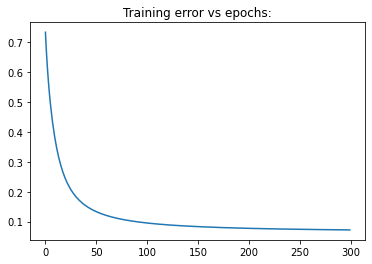

In [98]:
plt.title('Training error vs epochs:')
plt.plot(obj);
print('Trained weights are:\n',w)

### Prediction on test data:

In [99]:
z = np.dot(x_test,w)
y_pred = 1 / (1 + np.exp(-1*z))
y_pred[y_pred >= 0.5] = 1
y_pred[y_pred < 0.5] = 0

### Model Evaluation:

In [100]:
print('Model Accuracy:',np.mean(y_pred==y_test)*100,'%')

Model Accuracy: 96.36363636363636 %


**Confusion matrix:**

In [95]:
TP,FN,FP,TN = np.zeros(4)
for i in range(y_test.shape[0]):
    if y_pred[i]==1 and y_test[i]==1: # predicted=1 & true=1
        TP +=1  
    elif y_pred[i]==0 and y_test[i]==1: # predicted=0 & true=1
        FN +=1 
    elif y_pred[i]==1 and y_test[i]==0: # predicted=1 & true=0
        FP +=1 
    elif y_pred[i]==0 and y_test[i]==0: # predicted=0 & true=0
        TN +=1 
confusion_matrix = np.array([[TP,FN],[FP,TN]])
print(confusion_matrix)

[[115.   0.]
 [ 10. 150.]]


In [96]:
Accuracy = (TP+TN)/(TP+TN+FP+FN)
print('Accuracy:\t',Accuracy)
Recall = (TP)/(TP+FN)
print('Recall:\t\t',Recall)
Specificity = (TN)/(TN+FP)
print('Specificity:\t',Specificity)
Precision = (TP)/(TP+FP)
print('Precision:\t',Precision)
F1_score = 2*(Precision * Recall)/(Precision + Recall)
print('F1_score:\t',F1_score)

Accuracy:	 0.9636363636363636
Recall:		 1.0
Specificity:	 0.9375
Precision:	 0.92
F1_score:	 0.9583333333333334


## Support Vector Machine:

###  Training:

In [78]:
def svm_compute_cost(w):
    # calculate hinge loss
    distances = 1 - y_train * (np.dot(x_train, w))
    distances[distances < 0] = 0  # equivalent to max(0, distance)
    hinge_loss = (np.sum(distances) / n)

    # calculate cost
    cost = (1 / 2) * np.dot(w, w) + reg_strength * hinge_loss
    return cost

In [79]:
def svm_cost_gradient(w):
    # if only one example is passed (eg. in case of SGD)
    distance = 1 - (y_train * np.dot(x_train, w))
    grad_j = np.zeros(len(w))

    for ind,d in enumerate(distance):
        if max(0, d) == 0:
            di = w 
        else:
            di = w  - (reg_strength * y_train[ind] * x_train[ind])
        grad_j = grad_j + di  
    return grad_j/n

In [80]:
n = x_train.shape[0]
reg_strength = 10000
np.random.seed(42)
alpha = 0.000001
w = np.random.normal(0,1,size=x_train.shape[1])

obj = []

for i in range(10000):
    grad_j = svm_cost_gradient(w)
    w = w - (alpha) * (grad_j)
    J = svm_compute_cost(w)
    obj.append(J)

Trained weights are:
 [ 0.49177176 -1.60704144 -1.75739379 -1.57020835 -0.01659724]


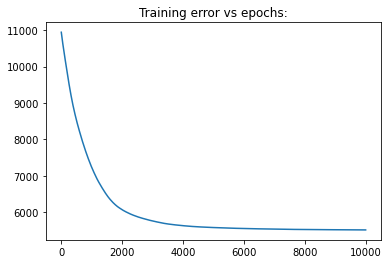

In [81]:
plt.title('Training error vs epochs:')
plt.plot(obj);
print('Trained weights are:\n',w)

### Prediction on test data:

In [82]:
y_pred = np.dot(x_test,w)
y_pred[y_pred>0] = 1
y_pred[y_pred<0] = 0

### Model Evaluation:

In [83]:
print('Model Accuracy:',np.mean(y_pred==y_test)*100,'%')

Model Accuracy: 96.0 %


**Confusion matrix:**

In [84]:

TP,FN,FP,TN = np.zeros(4)
for i in range(y_test.shape[0]):
    if y_pred[i]==1 and y_test[i]==1: # predicted=1 & true=1
        TP +=1  
    elif y_pred[i]==0 and y_test[i]==1: # predicted=0 & true=1
        FN +=1 
    elif y_pred[i]==1 and y_test[i]==0: # predicted=1 & true=0
        FP +=1 
    elif y_pred[i]==0 and y_test[i]==0: # predicted=0 & true=0
        TN +=1 
confusion_matrix = np.array([[TP,FN],[FP,TN]])
print(confusion_matrix)

[[115.   0.]
 [ 11. 149.]]


In [85]:
Accuracy = (TP+TN)/(TP+TN+FP+FN)
print('Accuracy:\t',Accuracy)
Recall = (TP)/(TP+FN)
print('Recall:\t\t',Recall)
Specificity = (TN)/(TN+FP)
print('Specificity:\t',Specificity)
Precision = (TP)/(TP+FP)
print('Precision:\t',Precision)
F1_score = 2*(Precision * Recall)/(Precision + Recall)
print('F1_score:\t',F1_score)

Accuracy:	 0.96
Recall:		 1.0
Specificity:	 0.93125
Precision:	 0.9126984126984127
F1_score:	 0.9543568464730291
